# MNIST(Modified National Institute of Science and Technology) 데이터 셋
* 손글씨 숫자(0, 1, 2, ... , 9) 데이터
* 분류 알고리즘을 테스트할 때 가장 많이 사용되는 데이터 셋
* 데이터 셋을 다운로드 후 구글 드라이브에 pickle 형태로 저장

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dir_path = '/content/drive/My Drive/Colab Notebooks/lab_ml'

In [3]:
# MNIST 데이터 셋 다운로드(scikit-learn의 MNIST 예제 데이터 다운로드)
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [4]:
mnist.keys() # dict의 key들의 리스트

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
mnist['DESCR'] # describe, description

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [7]:
X, y = mnist['data'], mnist['target'] # numpy.ndarray

In [9]:
X.shape # 784(28x28) pixel 이미지 70,000개 데이터

(70000, 784)

In [10]:
X[0] # 첫번째 이미지 샘플 픽셀 데이터(각 픽셀에는 0 ~ 255까지의 숫자들이 저장)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [11]:
y.shape

(70000,)

In [12]:
y[0] #> 이미지의 레이블

'5'

In [13]:
y.dtype #> 문자열(str)

dtype('O')

In [16]:
# pickle 형태로 mnist 데이터 셋을 구글 드라이브에 저장.
import os
import pickle  # Python 기본 모듈 중 하나. 바이너리 데이터를 저장/복원

file_path = os.path.join(dir_path, 'mnist.pickle')
print(file_path)

with open(file_path, mode='wb') as f: # 파일을 바이너리(b) 쓰기(w) 모드로 오픈.
  pickle.dump(mnist, f) # mnist 데이터를 파일 f에 씀.

/content/drive/My Drive/Colab Notebooks/lab_ml/mnist.pickle


In [17]:
# pickle 형태로 저장된 데이터를 읽음.
with open(file_path, mode='rb') as f:
  mnist = pickle.load(f)

mnist['data'].shape, mnist['target'].shape

((70000, 784), (70000,))

In [27]:
X, y = mnist['data'], mnist['target'].astype(np.int16)

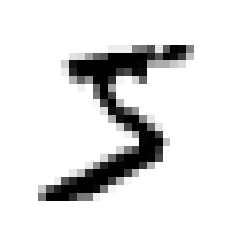

In [28]:
# 이미지 샘플을 그래프 출력
img = X[0].reshape((28, 28)) # X[0]: (784,) 1차원 배열 -> img: (28, 28) 2차원 배열
plt.imshow(img, cmap=plt.cm.binary)  # binary color map: 0-white, 255-black
plt.axis('off') # 좌표축 제거
plt.show()

In [29]:
y[0]

5

In [30]:
def plot_digit(data):
  """data: (784,) shape의 1차원 ndarray.
  28x28 이미지로 변환 후 화면에 출력."""
  img = data.reshape((28, 28))
  plt.imshow(img, cmap=plt.cm.binary)
  plt.axis(off)
  plt.show()

In [31]:
for label in y[:5]:
  print(label)

5
0
4
1
9


In [32]:
n = 60000
X_train, y_train = X[:n], y[:n]   # 훈련 셋, 훈련 레이블
X_test, y_test = X[n:], y[n:]     # 테스트 셋, 테스트 레이블
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

# 이진 분류기(Binary Classifier)

In [33]:
# 숫자 이미지 샘플이 5인지 아닌지를 분류하는 이진 분류기
# -> 레이블을 True, False로 변경.
y_train_5 = (y_train == 5)
y_train_5

array([ True, False, False, ...,  True, False, False])

In [34]:
# 머신 러닝 모델(알고리즘) 선택
from sklearn.linear_model import SGDClassifier

In [35]:
# 모델 생성
sgd_clf = SGDClassifier()

In [51]:
# 모델 훈련
sgd_clf.fit(X=X_train, y=y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
# 예측
y_pred_5 = sgd_clf.predict(X=X_train)
y_pred_5

array([ True, False, False, ...,  True, False, False])

In [53]:
# 평가(evalation) <- 평가 지표(metric)
# 정확도(accuracy): 전체 샘플들 중에 정확하게 분류한 비율.
accuracy = np.mean(y_train_5 == y_pred_5) # 실제값 == 예측값
accuracy

0.9609666666666666

In [54]:
# confusion matrix(혼동 행령)
from sklearn.metrics import confusion_matrix

In [55]:
conf_mat = confusion_matrix(y_true=y_train_5,
                            y_pred=y_pred_5)
conf_mat

array([[52780,  1799],
       [  543,  4878]])

In [56]:
tn, fp = 52780, 1799 # True Negative(진음성), False Positive(가양성)
fn, tp = 690, 4731 # False Negative(가음성), True Positive(진양성)

In [58]:
# 정확도(accuracy): 샘플들을 정확하게 분류한 비율.
accuracy = (tn + tp) / (tn + fp + fn + tp)
accuracy

0.9585166666666667

In [59]:
# 정밀도(precision): 양성 예측의 정확도
# 양성이라고 예측한 샘플들 중에서 정확하게 맞춘 비율.
precision = tp / (tp + fp)
precision

0.7245022970903522

In [60]:
# 재현율(recall): 실제 양성 샘플들 중에서 정확하게 맞춘 비율.
recall = tp / (tp + fn)
recall

0.8727172108467073

* 정밀도/재현율 트레이드오프(precision/recall trade-off):
일반적으로 정밀도가 높아지면 재현율이 낮아지고, 정밀도가 낮아지면 재현율이 높아짐.
* 정밀도 = 민감도(sensitivity) = TPR(True Positive Rate)

In [62]:
# F1-score: 정밀도와 재현율의 조화평균
f1 = 2 / (1/precision + 1/recall)
f1

0.7917329093799682

In [64]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_train_5, y_pred=y_pred_5)

0.9609666666666666

In [65]:
from sklearn.metrics import precision_score

precision_score(y_true=y_train_5, y_pred=y_pred_5)

0.7305676201887075

In [66]:
from sklearn.metrics import recall_score

recall_score(y_true=y_train_5, y_pred=y_pred_5)

0.8998339789706696

In [67]:
from sklearn.metrics import f1_score

f1_score(y_true=y_train_5, y_pred=y_pred_5)

0.8064142833526201